In [40]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv("CleanData.csv")

In [2]:
df = df.drop(columns="Unnamed: 0")
df

,age_group,gender,education,total_fam_income,marital_status,nicotine,alcohol,marijuana,cocaine,heroin,hallucinogen,inhalant,methamphetamine,pain_reliever,tranquilizer,stimulant,psychotherapeutic,think,plan,attempt
0,1,0,5,6,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,1,0,5,7,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,1,0,5,5,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,1,5,4,4,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1
4,1,0,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,3,0,3,7,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5751,2,0,2,6,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5752,2,0,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5753,5,1,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [43]:
X_raw = df.loc[:,'age_group':'psychotherapeutic']

In [44]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_raw)
X = enc.transform(X_raw).toarray()
X.shape

(5755, 47)

In [45]:
X

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [46]:
import pandas as pd
df = pd.read_csv("df.csv")

In [47]:
y_think = df['think']
y_plan = df['plan']
y_attempt = df['attempt']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_think_train, y_think_test = train_test_split(X, y_think, random_state=42,test_size = 0.2)
X_train, X_test, y_plan_train, y_plan_test = train_test_split(X, y_plan, random_state=42,test_size = 0.2)
X_train, X_test, y_attempt_train, y_attempt_test = train_test_split(X, y_attempt, random_state=42,test_size = 0.2)

In [49]:
from imblearn.over_sampling import SMOTE

## Logistic regression

In [50]:
# suicidal thoughts 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_pipe_grid = Pipeline([
        ('sampling', SMOTE()),
        ('classification', LogisticRegression())
    ])
log_param_grid = {'classification__C': [800,700,600,500,400,300,200,100,50,10]}
log_grid_T = GridSearchCV(log_pipe_grid, param_grid = log_param_grid, cv=5)
log_grid_T.fit(X_train, y_think_train)

print("Penalized logistic regression best mean kfold cross-validation score: {:.4f}".format(log_grid_T.best_score_))
print("Penalized logistic regression best parameters: {}".format(log_grid_T.best_params_))
print("Penalized logistic regression test set score: {:.4f}".format(log_grid_T.score(X_test, y_think_test)))

y_think_predlog = log_grid_T.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_think_test, y_think_predlog))

Penalized logistic regression best mean kfold cross-validation score: 0.5901
Penalized logistic regression best parameters: {'classification__C': 600}
Penalized logistic regression test set score: 0.6038
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       545
           1       0.63      0.60      0.61       606

    accuracy                           0.60      1151
   macro avg       0.60      0.60      0.60      1151
weighted avg       0.61      0.60      0.60      1151



In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_think_test, y_think_predlog))

0.6038227628149435


In [52]:
from sklearn.metrics import confusion_matrix
thinklog = confusion_matrix(y_think_test, y_think_predlog)
thinklog

array([[331, 214],
       [242, 364]])

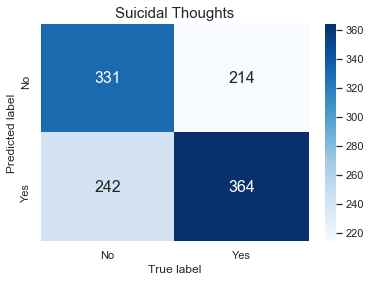

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(thinklog, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Thoughts', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

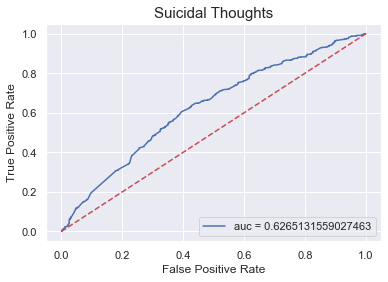

In [84]:
from sklearn import metrics
y_think_predlog_p = log_grid_T.predict_proba(X_test)[::,1]
fpr_thinklog, tpr_thinklog, thres_thinklog = metrics.roc_curve(y_think_test,  y_think_predlog_p)
auc_thinklog = metrics.roc_auc_score(y_think_test,  y_think_predlog_p)
plt.plot(fpr_thinklog,tpr_thinklog,label = "auc = "+ str(auc_thinklog))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Thoughts', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [54]:
# suicidal plan
log_grid_P = GridSearchCV(log_pipe_grid, param_grid = log_param_grid, cv=5)
log_grid_P.fit(X_train, y_plan_train)

print("Penalized logistic regression best mean kfold cross-validation score: {:.4f}".format(log_grid_P.best_score_))
print("Penalized logistic regression best parameters: {}".format(log_grid_P.best_params_))
print("Penalized logistic regression test set score: {:.4f}".format(log_grid_P.score(X_test, y_plan_test)))

y_plan_predlog = log_grid_P.predict(X_test)
print(classification_report(y_plan_test, y_plan_predlog))

Penalized logistic regression best mean kfold cross-validation score: 0.5819
Penalized logistic regression best parameters: {'classification__C': 600}
Penalized logistic regression test set score: 0.6021
              precision    recall  f1-score   support

           0       0.85      0.58      0.69       872
           1       0.34      0.68      0.45       279

    accuracy                           0.60      1151
   macro avg       0.60      0.63      0.57      1151
weighted avg       0.73      0.60      0.63      1151



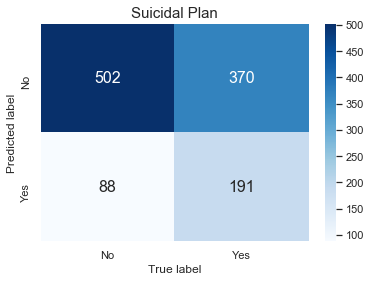

In [55]:
planlog = confusion_matrix(y_plan_test, y_plan_predlog)

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(planlog, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Plan', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

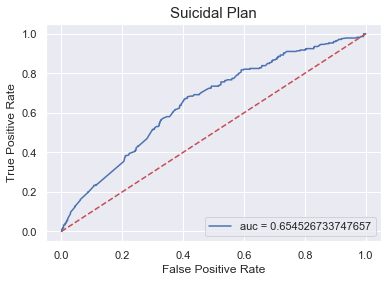

In [85]:
y_plan_predlog_p = log_grid_P.predict_proba(X_test)[::,1]
fpr_planlog, tpr_planlog, thres_planlog = metrics.roc_curve(y_plan_test,  y_plan_predlog_p)
auc_planlog = metrics.roc_auc_score(y_plan_test,  y_plan_predlog_p)
plt.plot(fpr_planlog, tpr_planlog, label = "auc = "+ str(auc_planlog))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Plan', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [56]:
# suicidal attempt
log_grid_A = GridSearchCV(log_pipe_grid, param_grid = log_param_grid, cv=5)
log_grid_A.fit(X_train, y_attempt_train)

print("Penalized logistic regression best mean kfold cross-validation score: {:.4f}".format(log_grid_A.best_score_))
print("Penalized logistic regression best parameters: {}".format(log_grid_A.best_params_))
print("Penalized logistic regression test set score: {:.4f}".format(log_grid_A.score(X_test, y_attempt_test)))

y_attempt_predlog = log_grid_A.predict(X_test)
print(classification_report(y_attempt_test, y_attempt_predlog))

Penalized logistic regression best mean kfold cross-validation score: 0.5956
Penalized logistic regression best parameters: {'classification__C': 700}
Penalized logistic regression test set score: 0.6012
              precision    recall  f1-score   support

           0       0.89      0.60      0.71       963
           1       0.23      0.63      0.34       188

    accuracy                           0.60      1151
   macro avg       0.56      0.61      0.53      1151
weighted avg       0.78      0.60      0.65      1151



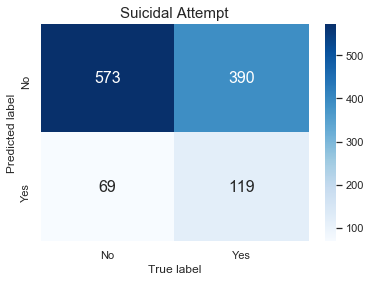

In [57]:
attemptlog = confusion_matrix(y_attempt_test, y_attempt_predlog)

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(attemptlog, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Attempt', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

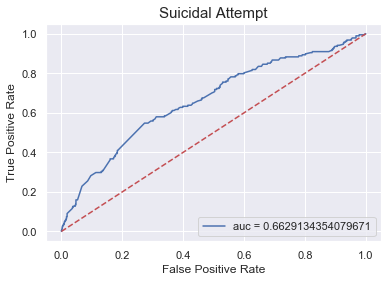

In [86]:
y_attempt_predlog_p = log_grid_A.predict_proba(X_test)[::,1]
fpr_attemptlog, tpr_attemptlog, thres_attemptlog = metrics.roc_curve(y_attempt_test,  y_attempt_predlog_p)
auc_attemptlog = metrics.roc_auc_score(y_attempt_test,  y_attempt_predlog_p)
plt.plot(fpr_attemptlog, tpr_attemptlog, label = "auc = "+ str(auc_attemptlog))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Attempt', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SVM

In [88]:
# suicidal thoughts
from sklearn.svm import SVC

svm_pipe_grid = Pipeline([
        ('sampling', SMOTE()),
        ('classification', SVC(probability = True))
    ])
svm_param_grid = {'classification__C': [1000,100,50,10,1],
                 'classification__kernel':['rbf'],
                'classification__gamma': [1,0.1,0.001,0.0001]}
svm_grid_T = GridSearchCV(svm_pipe_grid, param_grid = svm_param_grid, cv=5)
svm_grid_T.fit(X_train, y_think_train)

print("SVM best mean kfold cross-validation score: {:.4f}".format(svm_grid_T.best_score_))
print("SVM best parameters: {}".format(svm_grid_T.best_params_))
print("SVM test set score: {:.4f}".format(svm_grid_T.score(X_test, y_think_test)))

y_think_predsvc = svm_grid_T.predict(X_test)
print(classification_report(y_think_test, y_think_predsvc))

SVM best mean kfold cross-validation score: 0.6019
SVM best parameters: {'classification__C': 1000, 'classification__gamma': 0.001, 'classification__kernel': 'rbf'}
SVM test set score: 0.5873
              precision    recall  f1-score   support

           0       0.58      0.45      0.51       545
           1       0.59      0.71      0.64       606

    accuracy                           0.59      1151
   macro avg       0.59      0.58      0.58      1151
weighted avg       0.59      0.59      0.58      1151



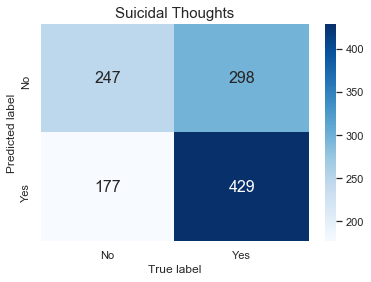

In [89]:
thinksvm = confusion_matrix(y_think_test, y_think_predsvc)

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(thinksvm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Thoughts', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

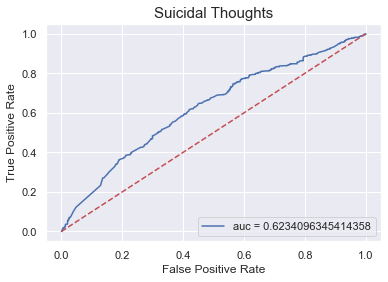

In [90]:
y_think_predsvm_p = svm_grid_T.predict_proba(X_test)[::,1]
fpr_thinksvm, tpr_thinksvm, thres_thinksvm = metrics.roc_curve(y_think_test,  y_think_predsvm_p)
auc_thinksvm = metrics.roc_auc_score(y_think_test,  y_think_predsvm_p)
plt.plot(fpr_thinksvm,tpr_thinksvm,label = "auc = "+ str(auc_thinksvm))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Thoughts', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [91]:
# suicidal plan
svm_grid_P = GridSearchCV(svm_pipe_grid, param_grid = svm_param_grid, cv=5)
svm_grid_P.fit(X_train, y_plan_train)

print("SVM best mean kfold cross-validation score: {:.4f}".format(svm_grid_P.best_score_))
print("SVM best parameters: {}".format(svm_grid_P.best_params_))
print("SVM test set score: {:.4f}".format(svm_grid_P.score(X_test, y_plan_test)))

y_plan_predsvc = svm_grid_P.predict(X_test)
print(classification_report(y_plan_test, y_plan_predsvc))

SVM best mean kfold cross-validation score: 0.6555
SVM best parameters: {'classification__C': 10, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}
SVM test set score: 0.6603
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       872
           1       0.35      0.47      0.40       279

    accuracy                           0.66      1151
   macro avg       0.58      0.59      0.58      1151
weighted avg       0.70      0.66      0.67      1151



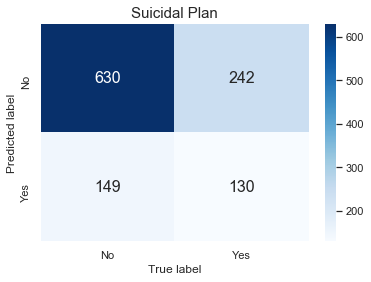

In [92]:
plansvm = confusion_matrix(y_plan_test, y_plan_predsvc)

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(plansvm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Plan', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

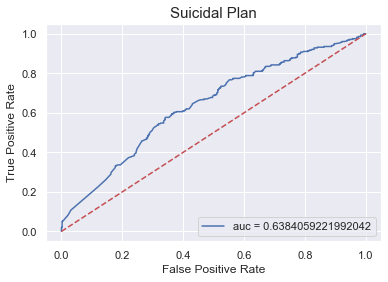

In [93]:
y_plan_predsvm_p = svm_grid_P.predict_proba(X_test)[::,1]
fpr_plansvm, tpr_plansvm, thres_plansvm = metrics.roc_curve(y_plan_test,  y_plan_predsvm_p)
auc_plansvm = metrics.roc_auc_score(y_plan_test,  y_plan_predsvm_p)
plt.plot(fpr_plansvm, tpr_plansvm, label = "auc = "+ str(auc_plansvm))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Plan', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [94]:
# suicidal attempt
svm_grid_A = GridSearchCV(svm_pipe_grid, param_grid = svm_param_grid, cv=5)
svm_grid_A.fit(X_train, y_attempt_train)

print("SVM best mean kfold cross-validation score: {:.4f}".format(svm_grid_A.best_score_))
print("SVM best parameters: {}".format(svm_grid_A.best_params_))
print("SVM test set score: {:.4f}".format(svm_grid_A.score(X_test, y_attempt_test)))

y_attempt_predsvc = svm_grid_A.predict(X_test)
print(classification_report(y_attempt_test, y_attempt_predsvc))

SVM best mean kfold cross-validation score: 0.6685
SVM best parameters: {'classification__C': 10, 'classification__gamma': 0.1, 'classification__kernel': 'rbf'}
SVM test set score: 0.6785
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       963
           1       0.27      0.56      0.36       188

    accuracy                           0.68      1151
   macro avg       0.58      0.63      0.57      1151
weighted avg       0.79      0.68      0.72      1151



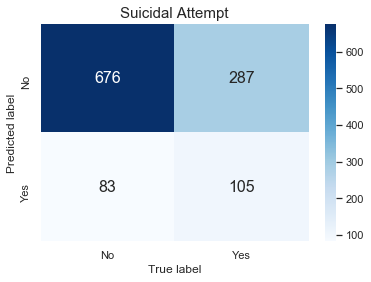

In [95]:
attemptsvm = confusion_matrix(y_attempt_test, y_attempt_predsvc)

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(attemptsvm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Attempt', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

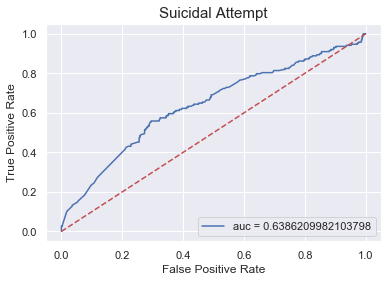

In [96]:
y_attempt_predsvm_p = svm_grid_A.predict_proba(X_test)[::,1]
fpr_attemptsvm, tpr_attemptsvm, thres_attemptsvm = metrics.roc_curve(y_attempt_test,  y_attempt_predsvm_p)
auc_attemptsvm = metrics.roc_auc_score(y_attempt_test,  y_attempt_predsvm_p)
plt.plot(fpr_attemptsvm, tpr_attemptsvm, label = "auc = "+ str(auc_attemptsvm))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Attempt', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest

In [64]:
# suicidal thoughts
from sklearn.ensemble import RandomForestClassifier

rf_pipe_grid = Pipeline([
        ('sampling', SMOTE()),
        ('classification', RandomForestClassifier(random_state = 42))
    ])
rf_param_grid = {'classification__n_estimators': [400,300,200,100,50],
                 'classification__max_depth':[1,2,3,4],
                'classification__max_features': ['auto', 'sqrt', 'log2']}
rf_grid_T = GridSearchCV(rf_pipe_grid, param_grid = rf_param_grid, cv=5)
rf_grid_T.fit(X_train, y_think_train)

print("Random forest best mean kfold cross-validation score: {:.4f}".format(rf_grid_T.best_score_))
print("Random forest best parameters: {}".format(rf_grid_T.best_params_))
print("Random forest test set score: {:.4f}".format(rf_grid_T.score(X_test, y_think_test)))

y_think_predrf = rf_grid_T.predict(X_test)
print(classification_report(y_think_test, y_think_predrf))

Random forest best mean kfold cross-validation score: 0.5925
Random forest best parameters: {'classification__max_depth': 4, 'classification__max_features': 'sqrt', 'classification__n_estimators': 100}
Random forest test set score: 0.5943
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       545
           1       0.62      0.59      0.60       606

    accuracy                           0.59      1151
   macro avg       0.59      0.59      0.59      1151
weighted avg       0.60      0.59      0.59      1151



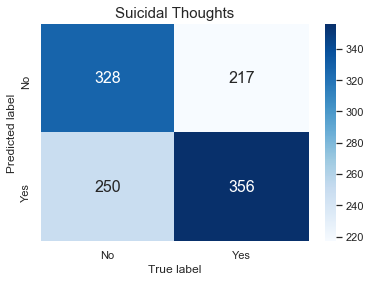

In [65]:
thinkrf = confusion_matrix(y_think_test, y_think_predrf)

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(thinkrf, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Thoughts', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

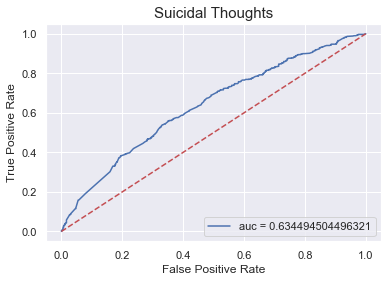

In [97]:
y_think_predrf_p = rf_grid_T.predict_proba(X_test)[::,1]
fpr_thinkrf, tpr_thinkrf, thres_thinkrf = metrics.roc_curve(y_think_test,  y_think_predrf_p)
auc_thinkrf = metrics.roc_auc_score(y_think_test,  y_think_predrf_p)
plt.plot(fpr_thinkrf,tpr_thinkrf,label = "auc = "+ str(auc_thinkrf))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Thoughts', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [66]:
# suicidal plan
rf_grid_P = GridSearchCV(rf_pipe_grid, param_grid = rf_param_grid, cv=5)
rf_grid_P.fit(X_train, y_plan_train)

print("Random forest best mean kfold cross-validation score: {:.4f}".format(rf_grid_P.best_score_))
print("Random forest best parameters: {}".format(rf_grid_P.best_params_))
print("Random forest test set score: {:.4f}".format(rf_grid_P.score(X_test, y_plan_test)))

y_plan_predrf = rf_grid_P.predict(X_test)
print(classification_report(y_plan_test, y_plan_predrf))

Random forest best mean kfold cross-validation score: 0.6533
Random forest best parameters: {'classification__max_depth': 1, 'classification__max_features': 'sqrt', 'classification__n_estimators': 200}
Random forest test set score: 0.6568
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       872
           1       0.35      0.48      0.40       279

    accuracy                           0.66      1151
   macro avg       0.58      0.60      0.58      1151
weighted avg       0.70      0.66      0.67      1151



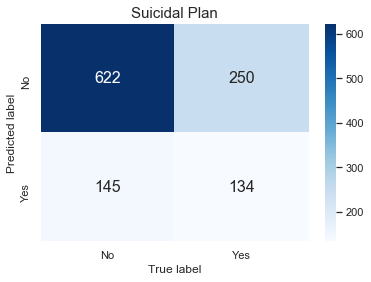

In [67]:
planrf = confusion_matrix(y_plan_test, y_plan_predrf)

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(planrf, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Plan', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

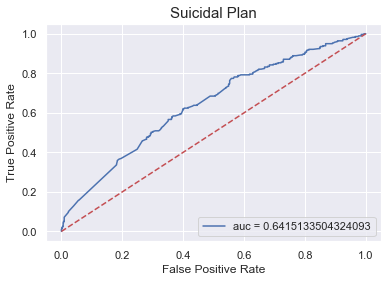

In [98]:
y_plan_predrf_p = rf_grid_P.predict_proba(X_test)[::,1]
fpr_planrf, tpr_planrf, thres_planrf = metrics.roc_curve(y_plan_test,  y_plan_predrf_p)
auc_planrf = metrics.roc_auc_score(y_plan_test,  y_plan_predrf_p)
plt.plot(fpr_planrf, tpr_planrf, label = "auc = "+ str(auc_planrf))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Plan', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [68]:
# suicidal attempt
rf_grid_A = GridSearchCV(rf_pipe_grid, param_grid = rf_param_grid, cv=5)
rf_grid_A.fit(X_train, y_attempt_train)

print("Random forest best mean kfold cross-validation score: {:.4f}".format(rf_grid_A.best_score_))
print("Random forest best parameters: {}".format(rf_grid_A.best_params_))
print("Random forest test set score: {:.4f}".format(rf_grid_A.score(X_test, y_attempt_test)))

y_attempt_predrf = rf_grid_A.predict(X_test)
print(classification_report(y_attempt_test, y_attempt_predrf))

Random forest best mean kfold cross-validation score: 0.6583
Random forest best parameters: {'classification__max_depth': 1, 'classification__max_features': 'sqrt', 'classification__n_estimators': 300}
Random forest test set score: 0.6603
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       963
           1       0.25      0.55      0.35       188

    accuracy                           0.66      1151
   macro avg       0.57      0.62      0.56      1151
weighted avg       0.78      0.66      0.70      1151



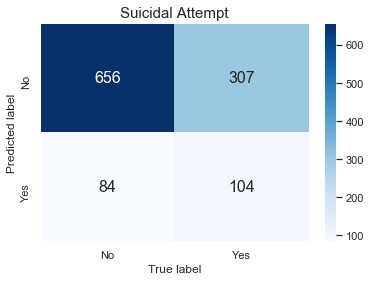

In [69]:
attemptrf = confusion_matrix(y_attempt_test, y_attempt_predrf)

x_axis_labels = ['No','Yes']
y_axis_labels = ['No','Yes']
sns.heatmap(attemptrf, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Suicidal Attempt', fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

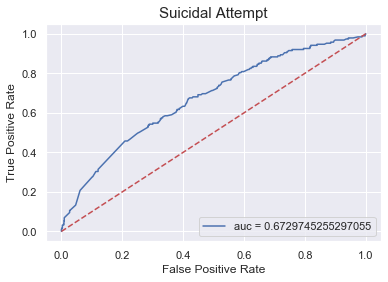

In [99]:
y_attempt_predrf_p = rf_grid_A.predict_proba(X_test)[::,1]
fpr_attemptrf, tpr_attemptrf, thres_attemptrf = metrics.roc_curve(y_attempt_test,  y_attempt_predrf_p)
auc_attemptrf = metrics.roc_auc_score(y_attempt_test,  y_attempt_predrf_p)
plt.plot(fpr_attemptrf, tpr_attemptrf, label = "auc = "+ str(auc_attemptrf))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Suicidal Attempt', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()